In [63]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os, warnings
from matplotlib import gridspec
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow.keras.layers.experimental.preprocessing as preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [64]:
data = pd.read_excel('calcific_tendinopathy_ddbb.xlsx')

In [65]:
data.head(30)

,image,calcium,pat_id,type,localization
0,0072879_001.png,1,72879,2,supraespinoso
1,0072879_002.png,1,72879,2,supraespinoso
2,00326955M_001.png,1,326955M,3,supraespinoso
3,00326955M_002.png,1,326955M,3,supraespinoso
4,0094847_001.png,0,94847,-1,NaN
5,00486523M_001.png,1,486523M,2,infraespinoso
6,00486523M_002.png,1,486523M,2,infraespinoso
7,00564810_001.png,1,564810,1,supraespinoso
8,00564810_002.png,1,564810,1,supraespinoso
9,00782404_001.png,1,782404,1,supraespinoso


In [66]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.4,
        rotation_range = 15,
        zoom_range=0.2,
        horizontal_flip=True)

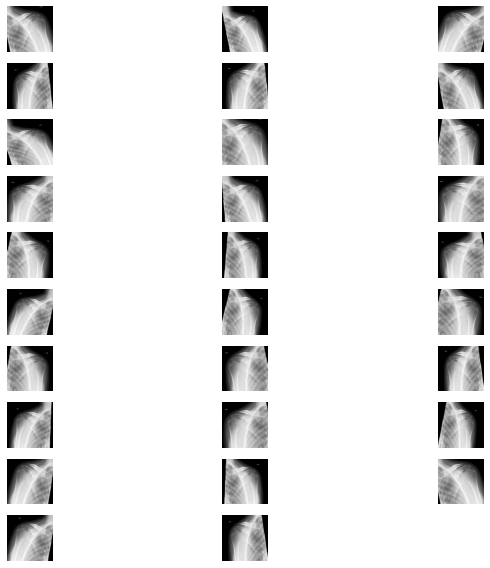

In [70]:
# let's plot some of the figures

from tensorflow.keras.preprocessing import image

fnames = [os.path.join('train/class_1',fname) for fname in os.listdir('train/class_1')]


img_path = fnames[1]

#reads image

img = image.load_img(img_path,target_size = (150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 1

plt.figure(figsize = (10,8))

for batch in train_datagen.flow(x,batch_size = 10):
    plt.subplot(10,3,i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    i += 1
    if i % 30 == 0:
        break
    
plt.tight_layout()

In [71]:
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [72]:
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
        'valid',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        'valid',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 24 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [3]:
model = keras.Sequential([
    layers.InputLayer(input_shape=[150, 150,3]),
    
    # Block One
    #layers.BatchNormalization(renorm=True), 
    #Yo diría que este batch normalization no es necesario aquí
    #Quizá convendriá usar padding valid, para que se vaya reduciendo el tamaños de los
    #feature maps
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),

    # Block Two
    #layers.BatchNormalization(renorm=True),
    #en una primera versión vamos a trabajar sin batch normalization
    layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),

    # Block Three
    #layers.BatchNormalization(renorm=True),
   # layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
   # layers.MaxPool2D(),
   # layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
   # layers.MaxPool2D(),
    

    # Head
    #layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    
    #quizá aquí un poco de dropout
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.summary()

NameError: name 'keras' is not defined

In [77]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [78]:
batch_size = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(
    train_generator,
    epochs=30,
    validation_data = validation_generator,
)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.7091 - binary_accuracy: 0.2917 - val_loss: 16.5943 - val_binary_accuracy: 0.6250
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 12.5859 - binary_accuracy: 0.7083 - val_loss: 3.7650 - val_binary_accuracy: 0.6250
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 2.6970 - binary_accuracy: 0.7083 - val_loss: 2.8869 - val_binary_accuracy: 0.3750
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 2.7345 - binary_accuracy: 0.2917 - val_loss: 1.9705 - val_binary_accuracy: 0.3750
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 1.8678 - binary_accuracy: 0.2917 - val_loss: 0.9714 - val_binary_accuracy: 0.3750
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 0.9232 - binary_accuracy: 0.2917 - val_loss: 0.7118 - val_binary_accuracy: 0.6250
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 0.6435 - binary_accurac

In [79]:
test_lost, test_acc = model.evaluate_generator(validation_generator)
print(test_acc)

/home/obarquero/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.625


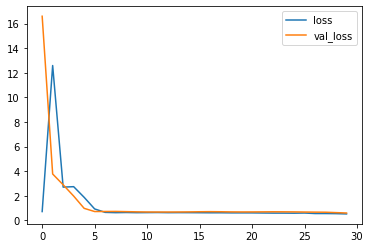

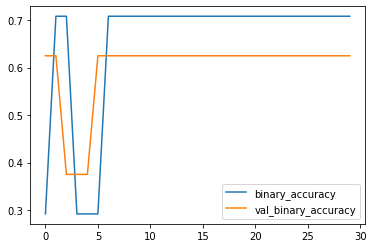

In [80]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();